In [ ]:
from importlib.metadata import version
print(version("nltk"))

3.4


In [1]:
import os
print(os.getcwd())

/content


## Creating Virtual Environment & installing required libraries

In [ ]:
# !pip install virtualenv
# !virtualenv myenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 16.2 MB/s eta 0:00:00
created virtual environment CPython3.10.12.final.0-64 in 2206ms
  creator CPython3Posix(dest=/content/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.2.1, setuptools==68.2.0, wheel==0.41.2
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [ ]:
!source myenv/bin/activate

/bin/bash: line 1: myenv/bin/activate: No such file or directory


In [ ]:
#!pip uninstall nltk

In [ ]:
# !pip install nltk
# import nltk
# nltk.download('all')

In [ ]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 30.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.0 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.
numba 0.56.

In [ ]:
pip install kmodes

##  Importing the required modules

In [ ]:
import re
import string

import spacy
from spacy.lang.en import STOP_WORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary

In [ ]:
import pyLDAvis.gensim

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import json

from sklearn.feature_extraction.text import TfidfVectorizer
#KModes
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel(r'drive/MyDrive/Colab Notebooks/Dissertation/Dataset/Dataset.xlsx', sheet_name='Sheet1')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# pd.reset_option("max_columns")
# pd.reset_option("max_rows")

In [ ]:
'''StopWords'''
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')
stop_words.extend( ['lol', 'huh', 'um', 'ok', 'ah', 'oh', 'yes', 'yeah', 'gonna' ,'yep', 'let', 'go', 'mhm', 'bye', 'sir', 'us', 'make', 'customer', 'agent', 'calling', 'american express', 'american', 'express',
                'thank',	'think',	'say',	'see',	'look',	'mean',	'try',	'come',	'thing',	'guy',	'guess',	'like',	'dot',	'com',	'speak',	'hear',	'sound',	'wife',	'husband',	'wonder',	'believe',	'stuff',	'hope',	'right',	'bit',	'suppose',	'correct',	'fine',	'kid',	'pull',	'love',	'daughter',	'case',	'seem',	'moment',	'mister',	'son',	'kind',	'perfect',	'feel',	'alright',	'child',	'hang',	'matter',	'man',	'dog',	'word',	'reach',	'life',	'huh',	'mom',	'shoot',	'cut',	'lady',	'rest',	'sort',	'well',	'welcome',	'water',	'bear',	'realize',	'explain',	'agree',	'leg',	'bunch',	'wish',	'excuse',	'cat',	'pop',	'sorry',	'mess',	'baby',	'victor',	'parent',	'push',	'head',	'expect',	'finish',	'pende',	'pleasure',	'brother',	'sister',	'hand',	'hate',	'past',	'gotcha',	'screw',	'bet',	'sky',	'girlfriend',	'kinda',	'shut',	'pardon',	'shoe',	'shit',	'thinking',	'honey',	'crap',	'wanna',	'bird',	'bravo',	'hell',	'amex',	'kick',	'romeo',	'promise',	'caroline',	'gentleman',	'joke',	'lay',	'echo',	'comment',	'joy',	'papa',	'excellent',	'cheryl',	'bless',	'void',	'jack',	'cry',	'marie',	'karen',	'morrow',	'donna',	'ass',	'shame',	'co',	'accent',	'nancy',	'carol',	'ton',	'mate',	'bree',	'ex',	'conrad',	'missus',	'gosh',	'respect',	'diane',	'suck',	'verse',	'aspen',	'fuck',	'trick',	'michelle',	'heck',	'freak',	'debbie',	'stacey',	'wendy',	'brandi',	'sake',	'george',	'hey',	'laura',	'terrance',	'lisa',	'rabbit',	'katie',	'aaa',	'louise',	'kurt',	'blah_blah',	'leslie',	'jen',	'dear',	'tampa',	'brenda',	'sean',	'diana',	'christopher',	'nicole',	'lawrence',	'underscore',	'janice',	'collin',	'cindy',	'bruce',	'jess',	'elaine',	'trisha',	'hello',	'yell',	'stephanie',	'bullshit',	'emma',	'0',	'gregory',	'susan',	'darle',	'shane',	'dennis',	'jean',	'wayne',	'edward',	'richard',	'jake',	'nonsense',	'betty',	'ana',	'graham',	'nichola',	'brett',	'randy',	'barry',	'carman',	'adventure',	'perspective',	'hd',	'insist',	'coat',	'stumble',	'daddy',	'incorrect',	'task',	'angle',	'kidding',	'nose',	'sofa_be',	'muscle',	'destroy',	'claire',	'kristen',	'st',	'harm',	'hero',	'mouth',	'wondering',	'eric',	'homework',	'blake',	'mon',	'bay',	'rely',	'corn',	'darling',	'sack',	'jude',	'christy',	'angele',	'trevor',	'hyphen',	'perse',	'andre',	'puppy',	'grass',	'flow',	'cody',	'gossip',	'marquis',	'samantha',	'sandy',	'arise',	'carlo',	'angel',	'dane',	'congratulation',	'taylor',	'craziness',	'frank',	'hi',	'medallion',	'breath',	'earth',	'lori',	'sock',	'clay',	'correspondence',	'nut',	'natalie',	'troy',	'stair',	'speech',	'dry',	'tick',	'sweetheart',	'op',	'aspect',	'narrow',	'authorize_user',	'austin',	'connor',	'breast',	'suspect',	'soup',	'forgive',	'confidence',	'taste',	'dark',	'anyway',	'mood',	'cream',	'alexander',	'paulo',	'ray',	'aunt',	'crazy',	'sharon',	'parker',	'meyer',	'jasmine',	'subway',	'juice',	'sauce',	'julia',	'exclamation',	'chill',	'brittany',	'envelope',	'courtney',	'daniel',	'trunk',	'tel',	'outta_curiosity',	'manner',	'adam',	'sweetie',	'rep',	'maximize',	'cake',	'vero',	'elise',	'brown',	'idiot',	'grease',	'moon',	'fence',	'eagle',	'banner',	'pence',	'vin',	'maturity',	'ash',	'definition',	'simone',	'square',	'team_leader',	'pro',	'knee',	'stuart',	'seven',	'bro',	'brick',	'gene',	'dave',	'friendship',	'carla',	'fortunate',	'rive',	'melissa',	'bass',	'household',	'matthew',	'bounce',	'boulder',	'jane',	'haul',	'unlimite',	'nicer',	'dca',	'robert',	'morne',	'boom',	'mercy',	'umbrella',	'lotta',	'farmer',	'showing',	'bulk',	'quid',	'sharma',	'might',	'perry',	'eight',	'asterisk',	'lena',	'scream',	'duck',	'bummer',	'steve',	'salt',	'debra',	'unfortunate',	'shelf',	'favorite',	'kay',	'randall',	'spoke',	'irene',	'janet',	'aruba',	'sally',	'skin',	'battle',	'swipe',	'charlene',	'okeydoke',	'equate',	'darn',	'cloister',	'vance',	'athlete',	'obtain',	'empire',	'nail',	'instal',	'castle',	'flex',	'thoma',	'anticipate',	'megabyte',	'inside',	'layer',	'megan',	'nash',	'three',	'murder',	'rachel',	'cabo',	'pastor',	'paste',	'ross',	'chocolate',	'paula',	'percy',	'barne',	'fre',	'dotcom',	'patiently_waite',	'hilton_honor',	'east_coast',	'austin_texa',	'loew',	'north_carolina',	'exit_row',	'billing_cycle',	'prob',	'authorized_user',	'square_footage',	'snow_storm',	'carbone',	'white_plain',	'waldorf',	'ranch',	'clothe',	'renee',	'beg',	'logon',	'steak_house',	'gal',	'minus',	'bark',	'squared_away',	'puerto_rico',	'boarding_passe',	'patiently_holde',	'infant',
              '...' ,'two','three','four','five','six','seven','eight','nine','zero', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen', 'seventeen', 'eighteen', 'nineteen', 'ten', 'twenty', 'thirty', 'forty', 'fifty', 'sixty', 'seventy', 'eighty', 'ninty','hundred','thousand', 'get','got','we','re','know','would','could','sure','said','maybe','probably','guys','ve','anything','everything','please','great','american express','thanks','little','also','says','whatever','one',
               'they', 'll', 'much' , 'appreciate', 'ma', 'am',
                'nt', 'i', 'd', 's', 'm', 're', 'ca', 'xs' ])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Data Wrangling

In [ ]:
'''Defining Data Wrangling Functions'''
def preprocess(text):
  #Remove HTML tags, URLs, special characters
  text = re.sub(r'<.*?>', '', text) # Remove HTML tags
  text = re.sub(r'http\S+|www\S+|https\S+', '', text) #Remove HTML tags, URLs, special characters
  text = re.sub(r'\[.*?\]', '', text) # Remove square brackets and contents
  text = re.sub(r'\([^)]*\)', '', text) # Remove parenthesis and contents
  text = re.sub(r'\{.*?\}', '', text)   # Remove curly brackets and contents
  text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
  #Convert text to lowercase
  text = text.lower()
  #Normalize contractions (e.g., "won't" -> "will not")
  text = re.sub(r"won't", "will not", text)
  #Normalize punctuation (e.g., remove repeated punctuation marks)
  text = re.sub(r'([!"#$%&\'()*+,-./:;<=>?@\[\\\]^_`{|}~])\1+', r'\1', text)
  # print(text,' \n')
  # Remove punctuation
  if text is None or not isinstance(text, str):
      return ""

  cleaned_text = ""
  for char in text:
      if (char not in string.punctuation):
          cleaned_text += char
  return cleaned_text

def remove_stopwords(sentence):
    words = word_tokenize(sentence)
    #print(words)
    filtered_sentence = [word for word in words if word.lower() not in stop_words]
    #print(filtered_sentence)
    return " ".join(filtered_sentence)

def remove_ner(sentence):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)
    filtered_sentence = [token.text for token in doc if not token.ent_type_]
    return " ".join(filtered_sentence)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
'''Preprocessing'''
df['Trnscr_tx'] = df['Trnscr_tx'].astype(str)
df['trans_cleaned'] = df['Trnscr_tx'].apply(preprocess)
df['trans_cleaned'] = df['trans_cleaned'].apply(remove_stopwords)
df['trans_cleaned'] = df['trans_cleaned'].apply(remove_ner)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Trnscr_tx,trans_cleaned
0,"Customer: Hello, I need to cancel my entire tr...",need cancel entire trip includes cruise car bo...
1,"Customer: Hi, I need to cancel my upcoming tri...",need cancel upcoming trip including cruise car...
2,"Customer: Hi Emily, I have a reservation for a...",emily reservation cruise car rental due unexpe...
3,"Customer: Hi Natalie, I have a reservation for...",reservation hotel stay guided tour due sudden ...
4,"Customer: Hi Oliver, I have a booking ID [Mask...",oliver booking i d need modify cruise car book...


## Creating Bigrams and Trigrams

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in df['trans_cleaned']])

# Filter only those that occur at least 50 times
finder.apply_freq_filter(50)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = nltk.collocations.TrigramCollocationFinder.from_documents([comment.split() for comment in df['trans_cleaned']])

# Filter only those that occur at least 50 times
finder.apply_freq_filter(50)
trigram_scores = finder.score_ngrams(trigram_measures.pmi)
bigram_pmi = pd.DataFrame(bigram_scores)
bigram_pmi.columns = ['bigram', 'pmi']
bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)
trigram_pmi = pd.DataFrame(trigram_scores)
trigram_pmi.columns = ['trigram', 'pmi']
trigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Filtering out nouns from the N-grams created

In [ ]:
# Filter for bigrams with only noun-type structures
def bigram_filter(bigram):
    tokens = nlp(bigram)
    if any(token.pos_ not in ['ADJ', 'NOUN'] for token in tokens):
        return False
    return True

# Filter for trigrams with only noun-type structures
def trigram_filter(trigram):
    tokens = nlp(trigram)
    if any(token.pos_ not in ['ADJ', 'NOUN'] for token in tokens):
        return False
    return True

# Apply filters to bigram and trigram dataframes
filtered_bigram = bigram_pmi[bigram_pmi.apply(lambda bigram: \
                                              bigram_filter(' '.join(bigram['bigram'])), axis=1)][:500]
filtered_trigram = trigram_pmi[trigram_pmi.apply(lambda trigram: \
                                                 trigram_filter(' '.join(trigram['trigram'])), axis=1)][:500]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert bigrams and trigrams to lists
bigrams = [' '.join(bigram) for bigram in filtered_bigram['bigram'].values if len(bigram[0]) > 2 or len(bigram[1]) > 2]
trigrams = [' '.join(trigram) for trigram in filtered_trigram['trigram'].values if (len(trigram[0]) > 2) or (len(trigram[1]) > 2) or (len(trigram[2]) > 2)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Concatenate n-grams
def replace_ngram(x):
    for gram in trigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x
df['trans_cleaned'] = df['trans_cleaned'].map(lambda x: replace_ngram(x))

# tokenize reviews + remove s4top words + remove names + remove words with less than 2 characters
df['trans_cleaned'] = df['trans_cleaned'].map(lambda x: [word for word in x.split()\
                                                 if word not in stop_words\
#                                                              and word not in english_names\
                                                              and len(word) > 2])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Filter for only nouns
def noun_only(words):
    doc = nlp(" ".join(words))
    filtered = [token.text for token in doc if token.pos_ == 'NOUN']
    return filtered

df['trans_cleaned'] = df['trans_cleaned'].map(noun_only)
df['trans_cleaned'] = df['trans_cleaned'].apply(lambda x: ' '.join(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

,Trnscr_tx,trans_cleaned
0,"Customer: Hello, I need to cancel my entire tr...",trip cruise car bookings circumstances proceed...
1,"Customer: Hi, I need to cancel my upcoming tri...",trip cruise car bookings family emergency trip...
2,"Customer: Hi Emily, I have a reservation for a...",reservation cruise car_rental circumstances tr...
3,"Customer: Hi Natalie, I have a reservation for...",reservation hotel tour change plans dates need...
4,"Customer: Hi Oliver, I have a booking ID [Mask...",booking need cruise car bookings changes resch...


In [ ]:
'''Saving the cleaned dataset to an excel file'''
df.to_excel(r'drive/MyDrive/Colab Notebooks/Dissertation/Dataset/Dataset_717_cleaned.xlsx', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
'''Reading cleaned data from the saved excel'''
df=pd.read_excel(r'drive/MyDrive/Colab Notebooks/Dissertation/Dataset/Dataset_717_cleaned.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
'''Getting the cleaned text into a list for building model further'''
df['trans_cleaned'] = df['trans_cleaned'].astype(str)
k=df['trans_cleaned'].tolist()
cleaned_text = [i.split() for i in df['trans_cleaned'].tolist()]
# l=[]
# for i in k[:5]:
#   l.append(i.split())
#cleaned_text = [doc.split() for doc in k]

# Model Building Pipeline

### LDA Model

In [ ]:
'''Creating Dictionary & Document Term Matrix'''
dictionary = corpora.Dictionary(cleaned_text)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in cleaned_text]

In [ ]:
'''Computing Coherence Score for each k value to find out the optimal k'''
#Optimizing k - Number of topics
coherence = []
for k in range(5,20):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    # ldamodel = Lda(doc_term_matrix, num_topics=k, id2word = dictionary, passes=40,\
    #                iterations=200, chunksize = 10000, eval_every = None)
    ldamodel = Lda(doc_term_matrix, num_topics=k, id2word = dictionary, passes=40,\
               iterations=200,  chunksize = 1000, eval_every = None, random_state=0)
    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=cleaned_text,\
                                                     dictionary=dictionary, coherence='c_v')
    coherence.append((k,cm.get_coherence()))

Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19


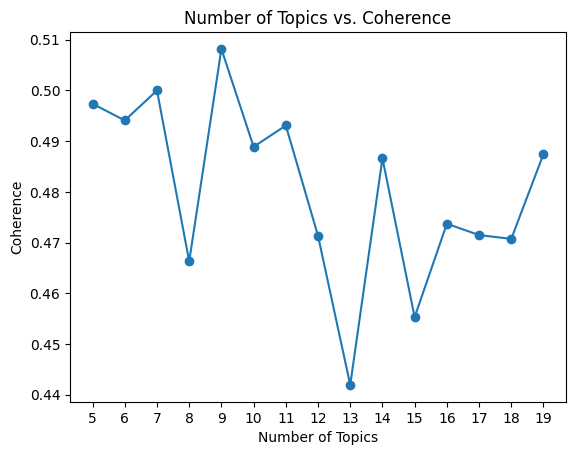

In [ ]:
'''Plotting Coherence Score vs k value'''
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

In [ ]:
# from importlib.metadata import version
# print(version("pandas"))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
'''Visualizing the formulated LDA clusters'''
Lda = gensim.models.ldamodel.LdaModel
ldamodel_9 = Lda(doc_term_matrix, num_topics=9, id2word = dictionary, passes=40,\
               iterations=200,  chunksize = 500, eval_every = None, random_state=0)
ldamodel=ldamodel_9
topic_data =  pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, mds = 'mmds', n_jobs=1) #
pyLDAvis.display(topic_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Getting Top words from each Topic(Cluster)

In [ ]:
def model_topic_words(ldamodel):
    # Get the top words for each topic cluster
    topic_words = ldamodel.show_topics(num_topics=-1, num_words=75, formatted=False)
    # Create a DataFrame to store the topic words
    lda_words = pd.DataFrame()
    # Loop through the topics and add the top words to the DataFrame
    for topic in topic_words:
        topic_id = topic[0]
        words = [word[0] for word in topic[1]]
        lda_words['Topic ' + str(topic_id)] = words
    return lda_words

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_words_9 = model_topic_words(ldamodel=ldamodel_9)
lda_words_9.to_excel(r'drive/MyDrive/Colab Notebooks/Dissertation/LDA_Output/ldawords_9.xlsx', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_words_9 = pd.read_excel(r'drive/MyDrive/Colab Notebooks/Dissertation/LDA_Output/ldawords_9.xlsx')
existing_header = lda_words_9.columns
lda_words_9.drop(0, axis=0, inplace=True)
second_header_values = lda_words_9.iloc[0]
lda_words_9 = lda_words_9.iloc[1:]
header = pd.MultiIndex.from_arrays([existing_header, second_header_values])
lda_words_9.columns = header

In [ ]:
lda_words_9

,Event Based Bookings,Hotel Related Enquiries,Hotel Reservations Related,General Enquiries,MR Points related,Airline Related,Escalations,Refund related,flight modifications
1,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8
2,romantic_getaway,reservation,hotel,activities,tour,flights,tickets,refund,flight
3,retreat,goodbye,room,family,points,details,situation,business,date
4,trip,details,details,family_vacation,membership,information,frustration,process,change
5,birthday,questions,reservation,resort,reward,booking,inconvenience,days,options
6,reservation,deluxe,hotels,options,experience,departure,experience,ticket,goodbye
...,...,...,...,...,...,...,...,...,...
72,audrey,serenity,digits,credit_card_information,service,security,share,lucas,ensure
73,security,enjoy,name,need,booking,meals,disaster,prevent,understand
74,arrangements,offer,information_assist,parents,glad_assist,seats,understand,order,dates


In [ ]:
'''LDA Topic Number and Name Mapping'''
header_dict = {'Topic Number':[], 'Topic Name':[]}

# Iterate through the columns and extract key-value pairs
for column in lda_words_9.columns:
    header1, subheader = column  # Unpack the MultiIndex
    header_dict['Topic Number'].append(subheader)
    header_dict['Topic Name'].append(header1)

LDA_Topic_Names = pd.DataFrame(header_dict)

In [ ]:
LDA_Topic_Names

,Topic Number,Topic Name
0,Topic 0,Event Based Bookings
1,Topic 1,Hotel Related Enquiries
2,Topic 2,Hotel Reservations Related
3,Topic 3,General Enquiries
4,Topic 4,MR Points related
5,Topic 5,Airline Related
6,Topic 6,Escalations
7,Topic 7,Refund related
8,Topic 8,flight modifications


In [ ]:
def format_topics_sentences(ldamodel, corpus, texts, df):
    # Init output
    sent_topics_df = pd.DataFrame()
    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), np.around(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    # Add original text to the end of the output
    # contents = pd.Series(texts)
    contents = df['Trnscr_tx']
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Transcript']
    return(sent_topics_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_topic_sents_keywords_9 = format_topics_sentences(ldamodel=ldamodel_9, corpus=doc_term_matrix, texts=cleaned_text, df=df)

df_topic_sents_keywords_9.to_excel(r'drive/MyDrive/Colab Notebooks/Dissertation/LDA_Output/df_topic_sents_keywords_9.xlsx')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-41-1da73833ad91>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), np.around(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-41-1da73833ad91>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), np.around(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-41-1da73833ad91>:14: FutureWarni

In [ ]:
df_topic_sents_keywords_9=pd.read_excel(r'drive/MyDrive/Colab Notebooks/Dissertation/LDA_Output/df_topic_sents_keywords_9.xlsx')

'''Getting Topicwise distribution of Topics'''
topic_counts = pd.DataFrame(df_topic_sents_keywords_9['Dominant_Topic'].value_counts())
topic_counts.reset_index(drop=False, inplace=True)
topic_counts.rename(columns={'Dominant_Topic':'Count', 'index':'Topic'}, inplace=True)
topic_counts['Topic'] = topic_counts['Topic'].apply(lambda x: 'Topic ' + str(x))
topic_counts_=pd.merge(topic_counts, LDA_Topic_Names, left_on='Topic', right_on='Topic Number', how='inner')
topic_counts_ = topic_counts_.loc[:, ['Topic Name','Topic','Count']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Plotting Topicwise distribution obtained by LDA

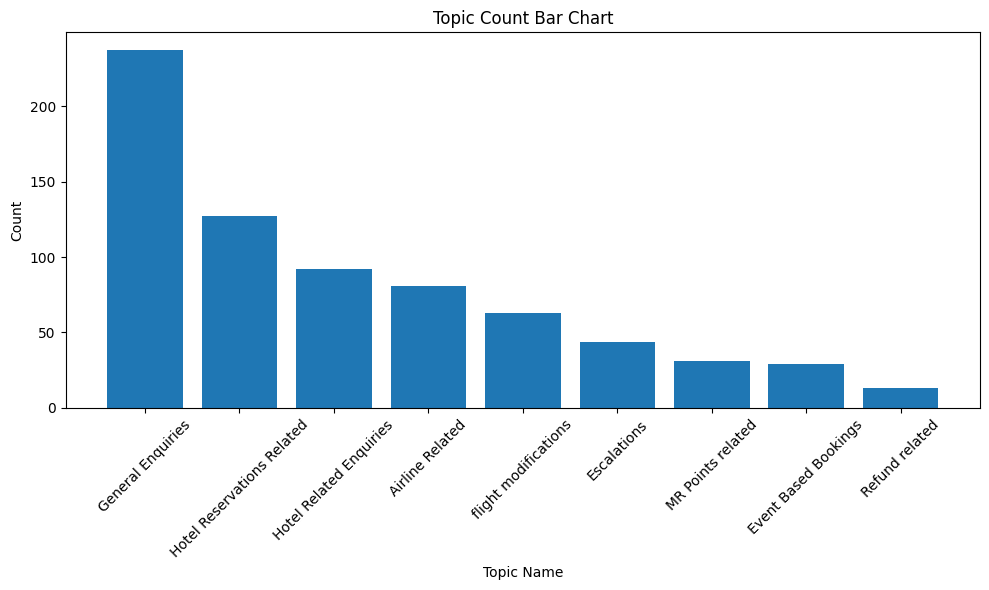

In [ ]:
'''Plotting Topicwise distribution'''
# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(topic_counts_['Topic Name'], topic_counts_['Count'])

# Add labels and title
plt.xlabel('Topic Name')
plt.ylabel('Count')
plt.title('LDA Topics Distribution')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # To prevent labels from getting cut off
plt.show()

### KModes Clustering
##### (Not a suitable approach)

In [ ]:
df=pd.read_excel(r'drive/MyDrive/Colab Notebooks/Dissertation/Dataset/Dataset_717_cleaned.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Vectorizing the text data

In [ ]:
# Use TfidfVectorizer to transform the text data
vectorizer = TfidfVectorizer()
df.dropna(subset=['trans_cleaned'], inplace=True)
X = vectorizer.fit_transform(df['trans_cleaned'])
threshold = 0.5
binary_data = np.where(X.toarray() > threshold, 1, 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X_dense = X.toarray()  # Convert sparse matrix to dense

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Finding Optimal K Value using Elbow curve method

In [ ]:
# Elbow curve to find optimal K
cost = []
silhouette_cost = []
K = range(5,25)

for k in list(K):
    kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1)
#     kmode = KModes(n_clusters=k, init = "Cao", max_iter=100, n_init = 10, verbose=1)
    clus = kmode.fit_predict(X_dense)
    silhouette_avg = silhouette_score(X_dense,clus)
    silhouette_cost.append(silhouette_avg)
    cost.append(kmode.cost_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 27170.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8, cost: 27147.0
Run 2, iteration: 2/100, moves: 0, cost: 27147.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 478, cost: 27226.0
Run 3, iteration: 2/100, moves: 0, cost: 27226.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 27133.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1, cost: 27154.0
Best run was number 4
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 27092.0
Run 1, iteration: 2/100, moves: 0, cost: 27092.0
Init: initializing centroids
Init: initializing cluster

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


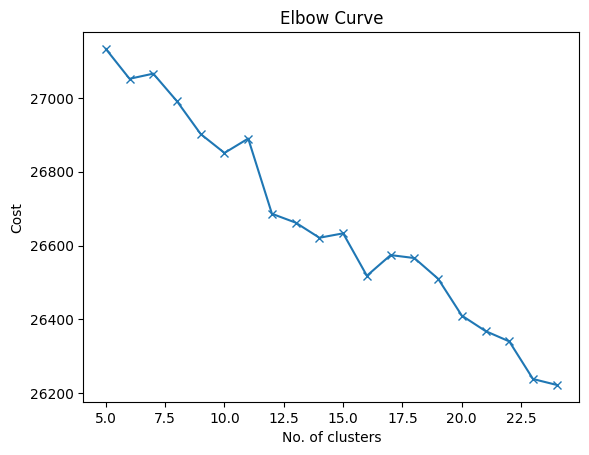

In [ ]:
plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


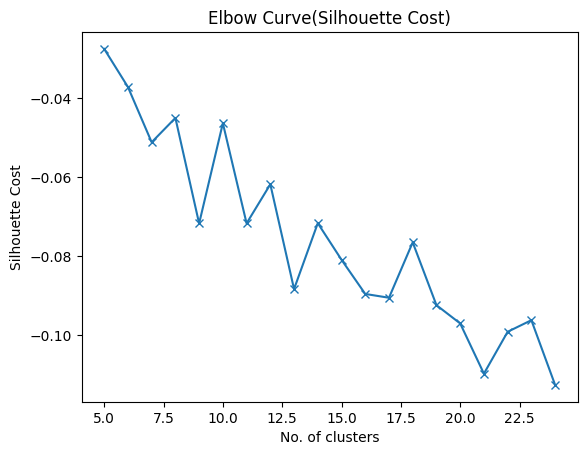

In [ ]:
plt.plot(K, silhouette_cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Cost')
plt.title('Elbow Curve(Silhouette Cost)')
plt.show()

In [ ]:
cost.index(min(cost))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


19

In [ ]:
'''Using TF-IDF Vectorizer'''
# Convert the words to TF-IDF vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['trans_cleaned']).toarray()

# Find the best K using the cost (or dissimilarity)
costs = []
K_range = range(5,25)

for k in K_range:
    kmode = KModes(n_clusters=k, init='Huang', n_init=3)
    kmode.fit_predict(X)
    costs.append(kmode.cost_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


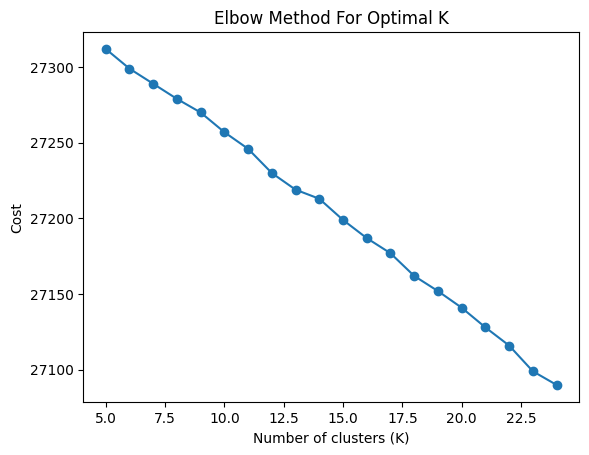

In [ ]:
# Plot the costs
plt.plot(K_range, costs, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal K')
plt.show()

#### Observation:-  As the (cost vs num of clusters) plot is not in elbow shape, and there are a lot of variations as the distribution progresses, it infers that it is not a good fit for our use case dataset.

## KMeans Clustering

In [ ]:
'''Reading the dataset again'''
df=pd.read_excel(r'drive/MyDrive/Colab Notebooks/Dissertation/Dataset/Dataset_717_cleaned.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt


# Convert the words to Count vectors (since KModes works with categorical data, CountVectorizer is more appropriate than TfidfVectorizer)
vectorizer = CountVectorizer()
df.dropna(subset=['trans_cleaned'], inplace=True)
X = vectorizer.fit_transform(df['trans_cleaned']).toarray()

# # Implement KModes clustering. For this example, we will use 2 clusters.
# km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)
# clusters = km.fit_predict(X)

# # Append the clusters to original dataframe
# df['Cluster'] = clusters

# If you wish to find the best 'K' using the cost value, you can use:
costs = []
K_range = range(1, 11)

for k in K_range:
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    km.fit_predict(X)
    costs.append(km.cost_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# kmodes = pickle.load(open('kmodes.pkl', 'rb'))
# clusters = pickle.load(open('clusters.pkl', 'rb'))
cluster_counts=pd.DataFrame(pd.DataFrame(pd.Series(clusters)).value_counts())
cluster_counts.rename(columns={0:'Counts'}, inplace=True)
cluster_counts.reset_index(drop=False, inplace=True)
cluster_counts.rename(columns={0:'Cluster'}, inplace=True)
cluster_counts.sort_values(by='Cluster', inplace=True)
cluster_counts.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cluster_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Cluster,Counts
0,0,708
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1
9,9,1


In [ ]:
# Define number of clusters
n_clusters = 5

km = KModes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(binary_data)

# Add clusters to the original dataframe
df['KModes'] = clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 59, cost: 9059.0
Run 1, iteration: 2/100, moves: 75, cost: 9009.0
Run 1, iteration: 3/100, moves: 4, cost: 9007.0
Run 1, iteration: 4/100, moves: 1, cost: 9007.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 77, cost: 9163.0
Run 2, iteration: 2/100, moves: 10, cost: 9155.0
Run 2, iteration: 3/100, moves: 1, cost: 9155.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 42, cost: 9155.0
Run 3, iteration: 2/100, moves: 2, cost: 9155.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 58, cost: 9020.0
Run 4, iteration: 2/100, moves: 11, cost: 9020.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 84, cost: 9016.0
Run 5, iteration

In [ ]:
df=pd.read_excel(r'drive/MyDrive/Colab Notebooks/Dissertation/Dataset/Dataset_717_cleaned.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install sentence_transformers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 113.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.4 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=f6da9c2d823989928697ea5eae41757153102184fa18a7d0bbb38c6df5c9c3d9
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pickle

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sentences = df['trans_cleaned']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Creating Sentence Embeddings using Sentence Transformer

In [ ]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
# with open('st_paraphrase_MiniLM_L6_v2.pkl', 'rb') as file:
#     model = pickle.load(file)
embeddings = model.encode(sentences, show_progress_bar=True)
print(embeddings.dtype)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Batches:   0%|          | 0/23 [00:00<?, ?it/s]

float32


In [ ]:
# with open('/content/drive/MyDrive/Colab Notebooks/Dissertation/embeddings.pkl', 'wb') as file:
#     pickle.dump(embeddings, file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Dissertation/embeddings.pkl', 'rb') as file:
    embeddings = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pca=PCA(n_components=2)
pca.fit(embeddings)
X=pca.fit_transform(embeddings)
X.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(717, 2)

Choosing Optimal K Value

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7a0038fedcf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/thread

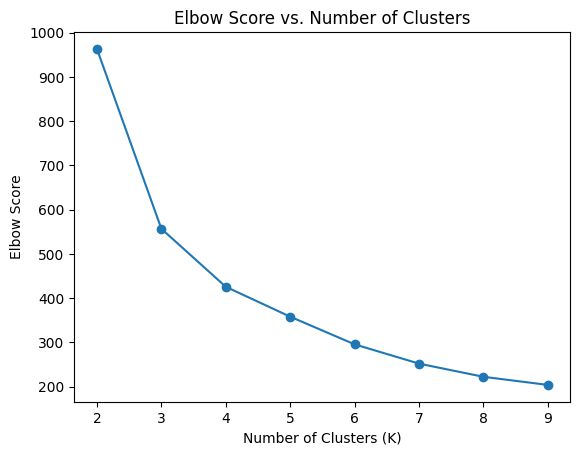

In [ ]:
# Calculate WCSS for different values of K
k_values = range(2, 10)  # Set the range of K values to evaluate
wcss_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    wcss_scores.append(kmeans.inertia_)

# Plot WCSS scores vs. K
plt.plot(k_values, wcss_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Elbow Score')
plt.title('Elbow Score vs. Number of Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

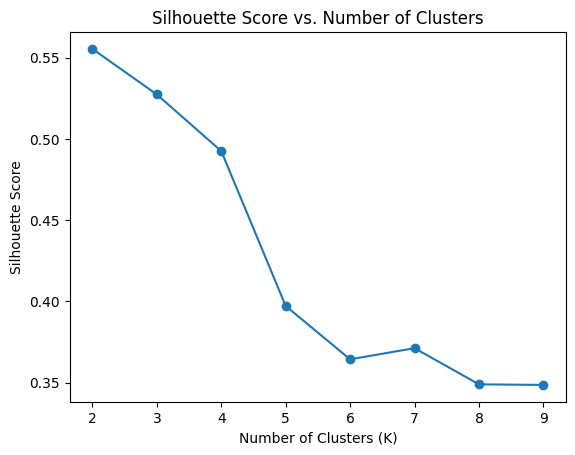

In [ ]:
# Calculate silhouette score for different values of K
from sklearn.metrics import silhouette_samples, silhouette_score
k_values = range(2, 10)  # Set the range of K values to evaluate
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot silhouette scores vs. K
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

Calculating tf-idf vectors for the text data

In [ ]:
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)
    return tf_idf, count

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
'''Calculates top n words from each topic'''
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=50):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    topic_words = {'Topic '+str(label): [words[j] for j in indices[i]][::-1] for i, label in enumerate(labels)}
    df_topic_words = pd.DataFrame(topic_words)
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return df_topic_words, top_n_words

'''Extract Topic sizes for each topic/cluster'''
def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .trans_cleaned
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "trans_cleaned": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Hyper parameter tuning to find the best parameters for optimal KMeans model

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for tuning
param_grid = {
    'n_clusters': [2, 3, 4, 5,],  # Number of clusters
    'init': ['k-means++', 'random'],  # Initialization method
    'n_init': [10, 20, 30, 50]  # Number of times the algorithm will be run with different centroid seeds
}
# Create K-means model
kmeans = KMeans(random_state=42)
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(X)
# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Best Hyperparameters:
# {'init': 'random', 'n_clusters': 5, 'n_init': 30}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Hyperparameters:
{'init': 'random', 'n_clusters': 5, 'n_init': 30}


In [ ]:
'''Training the model based on best hyperparameters'''
kmeans = KMeans(init='random', n_clusters= 5, n_init= 30)
kmeans.fit(X)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7d01a74da8c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = c

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


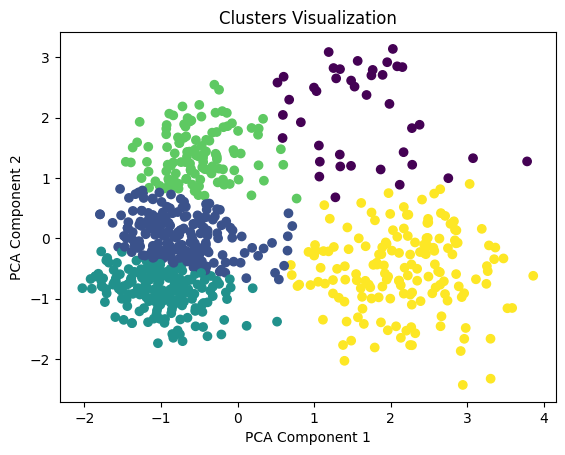

In [ ]:
'''Visualize the clusters'''
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualization')
plt.show()

In [ ]:
'''Associating KMeans Topic Labels with text data of each row'''
docs_df = pd.DataFrame(df[['Trnscr_tx', 'trans_cleaned']])
#docs_df.rename(columns={'trans_cleaned6':'Doc'}, inplace=True)
docs_df['Topic'] = kmeans.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_df.dropna(subset=['trans_cleaned'], inplace=True)
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'trans_cleaned': ' '.join})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tf_idf, count = c_tf_idf(docs_per_topic.trans_cleaned.values, m=len(sentences))
df_topic_words, top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=50)
topic_sizes = extract_topic_sizes(docs_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_topic_words.to_excel(r'/content/drive/MyDrive/Colab Notebooks/Dissertation/KMeans/kmeans_5_.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
'''Saving Topic, Keywords for each Sentence in a dataframe'''
cluster_ids = kmeans.fit_predict(embeddings)
#results = {'Sentence': [], 'Topic': [], 'Keywords': []}
results = []
for i, sentence in enumerate(df['trans_cleaned']):
    topic_id = cluster_ids[i]
    keywords = df_topic_words['Topic '+str(topic_id)].tolist()
    # results['Sentence'].append(sentence)
    # results['Topic'].append(topic_id)
    # results['Keywords'].append(', '.join(keywords))
    results.append({
    'Sentence': sentence,
    'Topic': topic_id,
    'Keywords': ', '.join(keywords)})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_kmeans_result = pd.DataFrame(results)
df_kmeans_result.to_excel(r'/content/drive/MyDrive/Colab Notebooks/Dissertation/KMeans/df_kmeans_topic_sent_.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
'''Writing KMeans model to pickle file'''
with open('/content/drive/MyDrive/Colab Notebooks/Dissertation/KMeans/kmeans_.pkl', 'wb') as file:
  pickle.dump(kmeans, file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
'''Reading from pickle file'''
with open('/content/drive/MyDrive/Colab Notebooks/Dissertation/KMeans/kmeans_.pkl', 'rb') as file:
  kmeans=pickle.load(file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_topic_words = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/Dissertation/KMeans/kmeans_5_.xlsx')
df_kmeans_result = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/Dissertation/KMeans/df_kmeans_topic_sent_.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_kmeans_result.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Sentence,Topic,Keywords
0,0,trip cruise car bookings circumstances proceed...,2,"extra_baggage, family_vacation, baggage_allowa..."
1,1,trip cruise car bookings family emergency trip...,2,"extra_baggage, family_vacation, baggage_allowa..."
2,2,reservation cruise car_rental circumstances tr...,2,"extra_baggage, family_vacation, baggage_allowa..."
3,3,reservation hotel tour change plans dates need...,1,"activities, kids, arrangements, records, attra..."
4,4,booking need cruise car bookings changes resch...,1,"activities, kids, arrangements, records, attra..."


In [ ]:
kmeans_tpc_counts = pd.DataFrame(df_kmeans_result['Topic'].value_counts())
kmeans_tpc_counts.reset_index(drop=False, inplace=True)
kmeans_tpc_counts.rename(columns={'Topic':'Count', 'index':'Topic'}, inplace=True)
kmeans_tpc_counts['Topic'] = kmeans_tpc_counts['Topic'].apply(lambda x: 'Topic ' + str(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
'''Assigning names to Topics'''
kmeans_tpc_counts.loc[kmeans_tpc_counts['Topic']=='Topic 4', 'Topic_name']='Grievances'
kmeans_tpc_counts.loc[kmeans_tpc_counts['Topic']=='Topic 2', 'Topic_name']='Air/Flight Related'
kmeans_tpc_counts.loc[kmeans_tpc_counts['Topic']=='Topic 0', 'Topic_name']='Hotel Reservations Related'
kmeans_tpc_counts.loc[kmeans_tpc_counts['Topic']=='Topic 3', 'Topic_name']='Modifications'
kmeans_tpc_counts.loc[kmeans_tpc_counts['Topic']=='Topic 1', 'Topic_name']='Travel Planning'
kmeans_tpc_counts = kmeans_tpc_counts.loc[:,['Topic_name','Topic','Count']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
kmeans_tpc_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_name,Topic,Count
0,Grievances,Topic 4,383
1,Air/Flight Related,Topic 2,136
2,Hotel Reservations Related,Topic 0,115
3,Modifications,Topic 3,56
4,Travel Planning,Topic 1,27


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


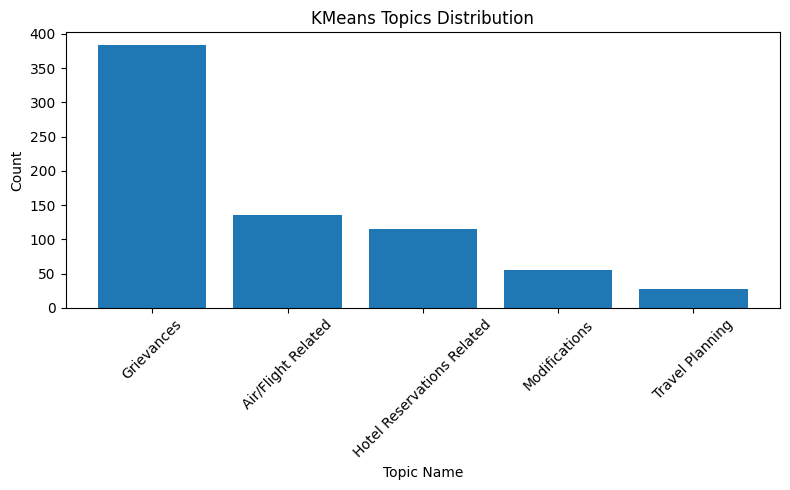

In [ ]:
'''Plotting Topicwise distribution'''
# Create a bar plot
plt.figure(figsize=(8, 5))  # Set the figure size
plt.bar(kmeans_tpc_counts['Topic_name'], kmeans_tpc_counts['Count'])

# Add labels and title
plt.xlabel('Topic Name')
plt.ylabel('Count')
plt.title('KMeans Topics Distribution')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # To prevent labels from getting cut off
plt.show()

# Findings - Pivot Table

In [ ]:
# df_topic_sents_keywords_9.drop(columns=['Unnamed: 0'], inplace=True)
df_kmeans_result.drop(columns=['Unnamed: 0'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_topic_sents_keywords_9.loc[df_topic_sents_keywords_9['Dominant_Topic']==3, 'Topic_Name_LDA'] = 'General Enquiries'
df_topic_sents_keywords_9.loc[df_topic_sents_keywords_9['Dominant_Topic']==2, 'Topic_Name_LDA'] = 'Hotel Reservations Related'
df_topic_sents_keywords_9.loc[df_topic_sents_keywords_9['Dominant_Topic']==5, 'Topic_Name_LDA'] = 'Airline Related'
df_topic_sents_keywords_9.loc[df_topic_sents_keywords_9['Dominant_Topic']==1, 'Topic_Name_LDA'] = 'Hotel Related Enquiries'
df_topic_sents_keywords_9.loc[df_topic_sents_keywords_9['Dominant_Topic']==8, 'Topic_Name_LDA'] = 'Flight modifications'
df_topic_sents_keywords_9.loc[df_topic_sents_keywords_9['Dominant_Topic']==6, 'Topic_Name_LDA'] = 'Escalations'
df_topic_sents_keywords_9.loc[df_topic_sents_keywords_9['Dominant_Topic']==0, 'Topic_Name_LDA'] = 'Event Based Bookings'
df_topic_sents_keywords_9.loc[df_topic_sents_keywords_9['Dominant_Topic']==4, 'Topic_Name_LDA'] = 'MR Points related'
df_topic_sents_keywords_9.loc[df_topic_sents_keywords_9['Dominant_Topic']==7, 'Topic_Name_LDA'] = 'Refund related'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_topic_sents_keywords_9.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,Perc_Contribution,Topic_Keywords,Transcript,Topic_Name_LDA
0,7,0.6965,"refund, business, process, days, ticket, accou...","Customer: Hello, I need to cancel my entire tr...",Refund related
1,7,0.9722,"refund, business, process, days, ticket, accou...","Customer: Hi, I need to cancel my upcoming tri...",Refund related
2,7,0.8377,"refund, business, process, days, ticket, accou...","Customer: Hi Emily, I have a reservation for a...",Refund related
3,8,0.2881,"flight, date, change, options, goodbye, bookin...","Customer: Hi Natalie, I have a reservation for...",Flight modifications
4,1,0.3583,"reservation, goodbye, details, questions, delu...","Customer: Hi Oliver, I have a booking ID [Mask...",Hotel Related Enquiries


In [ ]:
df_kmeans_result.loc[df_kmeans_result['Topic']==4, 'Topic_name']='Grievances'
df_kmeans_result.loc[df_kmeans_result['Topic']==2, 'Topic_name']='Air/Flight Related'
df_kmeans_result.loc[df_kmeans_result['Topic']==0, 'Topic_name']='Hotel Reservations Related'
df_kmeans_result.loc[df_kmeans_result['Topic']==3, 'Topic_name']='Modifications'
df_kmeans_result.loc[df_kmeans_result['Topic']==1, 'Topic_name']='Travel Planning'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_kmeans_result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sentence,Topic,Keywords,Topic_name
0,trip cruise car bookings circumstances proceed...,2,"extra_baggage, family_vacation, baggage_allowa...",Air/Flight Related
1,trip cruise car bookings family emergency trip...,2,"extra_baggage, family_vacation, baggage_allowa...",Air/Flight Related
2,reservation cruise car_rental circumstances tr...,2,"extra_baggage, family_vacation, baggage_allowa...",Air/Flight Related
3,reservation hotel tour change plans dates need...,1,"activities, kids, arrangements, records, attra...",Travel Planning
4,booking need cruise car bookings changes resch...,1,"activities, kids, arrangements, records, attra...",Travel Planning
...,...,...,...,...
712,travel_lifestyle_services_name romantic_getawa...,4,"situation, frustration, refund, issue, inconve...",Grievances
713,travel_lifestyle_services_name liam planning f...,4,"situation, frustration, refund, issue, inconve...",Grievances
714,travel_lifestyle_services_name romantic_getawa...,4,"situation, frustration, refund, issue, inconve...",Grievances
715,avery avery planning family_vacation school ho...,4,"situation, frustration, refund, issue, inconve...",Grievances


In [ ]:
df1 = df_topic_sents_keywords_9
df2 = df_kmeans_result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd

# Assuming you have two DataFrames df1 and df2
# Create a new column with common values that can be used for pivot
df1['Topic_Name_LDA'] = df1['Topic_Name_LDA'].astype(str)
df2['Topic_name'] = df2['Topic_name'].astype(str)

# Create a pivot table to see counts of overlapping values
pivot_table = pd.crosstab(df1['Topic_Name_LDA'], df2['Topic_name'])

pivot_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic_name,Air/Flight Related,Grievances,Hotel Reservations Related,Modifications,Travel Planning
Topic_Name_LDA,,,,,
Airline Related,0,79,2,0,0
Escalations,43,0,1,0,0
Event Based Bookings,0,21,8,0,0
Flight modifications,25,27,4,0,7
General Enquiries,2,117,63,54,1
Hotel Related Enquiries,51,35,2,2,2
Hotel Reservations Related,3,89,18,0,17
MR Points related,3,12,16,0,0
Refund related,9,3,1,0,0
